In [1]:
# Load p4_rich_tokens.parquet:
import pandas as pd
import numpy as np

complete_data = pd.read_parquet('p4_rich_tokens.parquet')

In [2]:
print(complete_data.shape)

(957179, 19)


In [3]:
print(complete_data.columns)

Index(['id', 'domain', 'type', 'url', 'content', 'scraped_at', 'inserted_at',
       'updated_at', 'title', 'authors', 'keywords', 'meta_keywords',
       'meta_description', 'tags', 'summary', 'source', 'cleaned_content',
       'tokens', 'rich_tokens'],
      dtype='object')


In [4]:
# print rich_tokens:
#print('tokens:', complete_data['tokens'])
#print('rich_tokens:', complete_data['rich_tokens'])

# print number of unique in both:
#print('unique tokens:', len(complete_data['tokens'].unique()))
#print('unique rich_tokens:', len(complete_data['rich_tokens'].unique()))

# Counter of tokens:
from collections import Counter
tokens_counter = Counter(complete_data['tokens'])
#print('tokens_counter:', tokens_counter)
# print how many tokens have more than 1 occurence:
print('tokens_counter:', len([k for k, v in tokens_counter.items() if v > 1]))
# print the one that is there the most:
print('most common token:', tokens_counter.most_common(1))
# how many imes it appears:
print('most common token:', tokens_counter.most_common(1)[0][1])

#print('rich_tokens:', complete_data['rich_tokens'].value_counts())


tokens_counter: 17758
most common token: [('plu one articl googl plu ( thank ali alfoneh assist compil ) polit nuclear issu suprem leader tell islam student associ foreign univers : " conspiraci machin enemi , includ \' scientif apartheid \' tri subject nation , strengthen uniti peopl . " head iran \' nuclear energi agenc : " condit right implement addit protocol . " reactor come onlin ? militari admir habib - allah sayyari , chief islam republ iran navi : " closur hormuz strait consider " upcom war game . ad iranian - made submarin soon leav dock southern iran . seyi - yahya rahim safavi , former irgc head current advisor suprem leader : " risk attack iran minim iran \' defens doctrin entail nuclear weapon . " societi cultur iranian psychologist , davar sheikhavandi : " window shop bring girl boy togeth social danger environ , shop mall prelud decad . " islam republ \' minist interior inform public chang pre - islam nowruz [ new year ] holiday iran . public health minist health : " ir

In [4]:
# We create a simply classification model: Fake news or real news.
# For each token, we calculate the average occurance rate in the fake news and in the real news.
# We take the ratios of average occurance rates to calculate the importance of each token in the classification.
# The simple model will be a weighted sum of the real-ness of each token and the fake-ness of each token.
# The final classification will be the sign of the weighted sum.
# No training required, since we are using the average occurance rates:


def vocabulary(rich_tokens):
    vocab = set()
    for tokens_string in rich_tokens:
        # Split the string into tokens based on spaces
        tokens = tokens_string.split(" ")
        # Update the set with these tokens, not characters
        vocab.update(tokens)
    return vocab





# fake rich tokens contains bias, fake, conspiracy, and hate in the 'type':
#fake_data = complete_data[complete_data['type'] == 'fake']
# combine fake and conspiracy:
fake_data = complete_data[complete_data['type'].isin(['fake', 'conspiracy', 'bias', 'hate'])]
real_data = complete_data[complete_data['type'].isin(['reliable', 'political'])]

fake_rich_tokens = fake_data['rich_tokens']
real_rich_tokens = real_data['rich_tokens']

fake_vocab = vocabulary(fake_rich_tokens)
real_vocab = vocabulary(real_rich_tokens)



complete_vocab = fake_vocab.union(real_vocab)

print('Number of tokens in the complete vocabulary:', len(complete_vocab))
print('Number of tokens in the fake vocabulary:', len(fake_vocab))
print('Number of tokens in the real vocabulary:', len(real_vocab))

# Redo, but this time we split the data into 80, 10, 10 percent for training, validation, and testing, respectively.

# Split the data into training, validation, and testing sets:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(complete_data, test_size=0.2, random_state=42)
validation_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

train_fake_data = train_data[train_data['type'].isin(['fake', 'conspiracy', 'bias', 'hate'])]
train_real_data = train_data[train_data['type'].isin(['reliable', 'political'])]

train_fake_rich_tokens = train_fake_data['rich_tokens']
train_real_rich_tokens = train_real_data['rich_tokens']

train_fake_vocab = vocabulary(train_fake_rich_tokens)
train_real_vocab = vocabulary(train_real_rich_tokens)
train_complete_vocab = train_fake_vocab.union(train_real_vocab)


print('Number of tokens in the train complete vocabulary:', len(train_complete_vocab))
print('Number of tokens in the train fake vocabulary:', len(train_fake_vocab))
print('Number of tokens in the train real vocabulary:', len(train_real_vocab))

# Again for validation and testing:
validation_fake_data = validation_data[validation_data['type'].isin(['fake', 'conspiracy', 'bias', 'hate'])]
validation_real_data = validation_data[validation_data['type'].isin(['reliable', 'political'])]

validation_fake_rich_tokens = validation_fake_data['rich_tokens']
validation_real_rich_tokens = validation_real_data['rich_tokens']

validation_fake_vocab = vocabulary(validation_fake_rich_tokens)
validation_real_vocab = vocabulary(validation_real_rich_tokens)
validation_complete_vocab = validation_fake_vocab.union(validation_real_vocab)


# and for testing:
test_fake_data = test_data[test_data['type'].isin(['fake', 'conspiracy', 'bias', 'hate'])]
test_real_data = test_data[test_data['type'].isin(['reliable', 'political'])]

test_fake_rich_tokens = test_fake_data['rich_tokens']
test_real_rich_tokens = test_real_data['rich_tokens']

test_fake_vocab = vocabulary(test_fake_rich_tokens)
test_real_vocab = vocabulary(test_real_rich_tokens)
test_complete_vocab = test_fake_vocab.union(test_real_vocab)





complete_vocab = train_complete_vocab.union(validation_complete_vocab).union(test_complete_vocab)





Number of tokens in the complete vocabulary: 225876
Number of tokens in the fake vocabulary: 183324
Number of tokens in the real vocabulary: 195325
Number of tokens in the train complete vocabulary: 221744
Number of tokens in the train fake vocabulary: 175108
Number of tokens in the train real vocabulary: 188195


In [5]:
from collections import Counter


def vocabulary(rich_tokens):
    vocab = Counter()
    for sequence in rich_tokens:
        tokens = sequence.split()
        vocab.update(tokens)
    return vocab

complete_vocab = vocabulary(complete_data['rich_tokens'])
train_fake_vocab = vocabulary(train_fake_data['rich_tokens'])
train_real_vocab = vocabulary(train_real_data['rich_tokens'])

print('Number of tokens in the complete vocabulary:', len(complete_vocab))

Number of tokens in the complete vocabulary: 234464


In [6]:

frequent_words = {word: count for word, count in complete_vocab.items() if count > 1000}

train_fake_occurances = {word: count for word, count in train_fake_vocab.items() if word in frequent_words}
train_real_occurances = {word: count for word, count in train_real_vocab.items() if word in frequent_words}

print('Top 10 fake tokens:')
print(sorted(train_fake_occurances.items(), key=lambda x: x[1], reverse=True)[:10])
print('Top 10 real tokens:')
print(sorted(train_real_occurances.items(), key=lambda x: x[1], reverse=True)[:10])


train_fake_rich_tokens = train_fake_data['rich_tokens']
train_real_rich_tokens = train_real_data['rich_tokens']

from collections import Counter


def size_of_token_sequence_list(sequence_list):
    count = Counter()
    for sequence in sequence_list:
        tokens = sequence.split()
        count.update(tokens)
    return sum(count.values())

def size_of_token_sequence_list_v2(sequence_list):
    # same but if its in frequent_words
    count = Counter()
    for sequence in sequence_list:
        tokens = sequence.split()
        count.update([word for word in tokens if word in frequent_words])
    
    return sum(count.values())


# if is in frequent_words:
train_fake_richer_token_count = size_of_token_sequence_list_v2(train_fake_rich_tokens)
train_real_richer_token_count = size_of_token_sequence_list_v2(train_real_rich_tokens)


# average:
train_fake_token_rates = {word: train_fake_occurances[word] / train_fake_richer_token_count for word in train_fake_vocab if word in frequent_words}
train_real_token_rates = {word: train_real_occurances[word] / train_real_richer_token_count for word in train_real_vocab if word in frequent_words}




# Calculate the importance of each token in the classification:
train_token_importance = {}
for token in frequent_words:
    # We want the difference. Fake is - and real is +.
    #token_importance[token] = real_token_rates[token] - fake_token_rates[token]
    # Some words may not appear in both fake and real news, so we need to handle this case:
    if token in train_fake_token_rates and token in train_real_token_rates:
        #train_token_importance[token] = train_real_token_rates[token] - train_fake_token_rates[token]
        # I want to normalize the token rates so that their sum is 1:
        #current_sum = train_real_token_rates[token] + train_fake_token_rates[token]
        #train_token_importance[token] = (train_real_token_rates[token] - train_fake_token_rates[token]) / current_sum
        if train_real_token_rates[token] > train_fake_token_rates[token]:
            train_token_importance[token] = (train_real_token_rates[token] / train_fake_token_rates[token] -1)
        else:
            train_token_importance[token] = -((train_fake_token_rates[token] / train_real_token_rates[token]) - 1)

    elif token in train_fake_token_rates:
        train_token_importance[token] = 0
    else:
        train_token_importance[token] = 0 


# Sort the tokens by importance:
train_sorted_tokens = sorted(train_token_importance.items(), key=lambda x: x[1], reverse=True)

# Print the 10 most important tokens:
print('The 50 most positive tokens:')
print(train_sorted_tokens[:50])
print('The 50 most negative tokens:')
print(train_sorted_tokens[-50:])

# most neutral tokens (lowest absolute value) that aren't exactly 0
print('The 50 most neutral tokens:')
#print(sorted(train_token_importance.items(), key=lambda x: abs(x[1]))[:50])
#exlucude 0:
print(sorted([x for x in train_token_importance.items() if x[1] != 0], key=lambda x: abs(x[1]))[:50])


Top 10 fake tokens:
[(',', 5809153), ('.', 5806742), ('<num>', 1955302), ('"', 1932354), ("'", 1746881), ('-', 1278484), (':', 653730), (')', 592399), ('(', 580634), ('?', 308690)]
Top 10 real tokens:
[('.', 10202872), (',', 9307228), ("'", 4078123), ('<num>', 3251668), ('"', 3062065), ('-', 2484373), (':', 886558), (')', 691604), ('(', 685507), ('said', 674782)]
The 50 most positive tokens:
[('yazd', 3972.9226898769853), ('davar', 3972.761521742587), ('alfoneh', 3181.6193836046077), ('aftab', 3179.8143004993385), ('safavi', 1588.3112069357555), ('nowruz', 1324.6616281435224), ('gholam', 1221.9438038198714), ('kayhan', 1059.529302514818), ('rec', 928.2320976954093), ('shorefront', 654.954307004069), ('kossack', 623.0430163930604), ('pooti', 610.7942381787337), ('bulgi', 537.3015688927741), ('fullscreen', 515.3827026145055), ('trumprussia', 312.5257441175878), ('telecharg', 310.05449939013596), ('magnifico', 306.9385821250879), ('sayyari', 304.6243730157685), ('dko', 264.2367011824105),

In [7]:
# How many occurances of the word "sheepl" in both:
print('Number of occurances of "child" in fake news:', train_fake_occurances['child'])
print('Number of occurances of "child" in real news:', train_real_occurances['child'])

# occurance:
print('Rate of "child" in fake news:', train_fake_token_rates['child'])
print('Rate of "child" in real news:', train_real_token_rates['child'])

# negativity:
print('Score of "child":', train_token_importance['child'])


Number of occurances of "child" in fake news: 19506
Number of occurances of "child" in real news: 27839
Rate of "child" in fake news: 0.00023967932955255348
Rate of "child" in real news: 0.00022052364507532457
Score of "child": -0.08686453768114477


In [8]:
def classify(sequence, token_importance):
    tokens = sequence.split()
    score = 0
    for token in tokens:
        if token in token_importance:
            score += token_importance[token]
    return score

def bin_classify(sequence, token_importance):
    score = classify(sequence, token_importance)
    return score > 0

# Test the classification model on the training data:
Y = train_data['type']
Y_pred = train_data['rich_tokens'].apply(lambda x: bin_classify(x, train_token_importance))

#Y_pred = Y_pred.replace({False: 'fake', True: 'real'})

print('y_pred:', Y_pred)
# print first 10 of both y and y_pred

# Synonyms for fake and real:
#Y = Y.replace({'fake': False, 'conspiracy': False, 'bias': False, 'hate': False, 'reliable': True, 'political': True})
# TypeError: Cannot set non-string value 'False' into a StringArray.^
#Y_bin = Y.isin(['fake', 'conspiracy', 'bias', 'hate'])
Y_bin = Y.isin(['reliable', 'political'])
Y_pred_bin = Y_pred

# Remove all rows with NaN values or values that aren't in the set {True, False} from BOTH Y and Y_pred:
# I.e. if Y has a NaN value at index i, remove index i from Y and Y_pred.
mask = Y_bin.isin([True, False])
Y_bin = Y_bin[mask]
Y_pred_bin = Y_pred_bin[mask]




from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_bin, Y_pred_bin)
print('Training accuracy:', accuracy)


y_pred: __null_dask_index__
16389    False
16971    False
26070    False
22583     True
9579      True
         ...  
11178     True
24838     True
7932     False
20155     True
28958    False
Name: rich_tokens, Length: 765743, dtype: bool
Training accuracy: 0.7614304015838212


In [15]:
# Export the model. So the importance of each token, in csv:
import csv


with open('simple_model_importance.csv', 'w', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['token', 'importance'])
    for token, importance in train_token_importance.items():
        writer.writerow([token, importance])
    


In [9]:
# How much of the training data is real:
print('Fraction of real news in the training data:', Y_bin.mean())
# How much of the predictions were real:
print('Fraction of real news in the predictions:', Y_pred_bin.mean())

Fraction of real news in the training data: 0.41559766135635584
Fraction of real news in the predictions: 0.46653511687341576


In [156]:
#print token_importance:
print('Token importance:', train_token_importance)

Token importance: {'plu': 2.984704501522293, 'one': 0.009988437027791175, 'articl': -0.5474040284162298, 'googl': -0.006929282706636286, '(': -0.31386698289842574, 'thank': 1.3453378916441352, 'ali': 16.52316870203728, 'alfoneh': 3181.6193836046077, 'assist': 1.011047715998615, 'compil': 7.127855534229111, ')': -0.32867159402886625, 'polit': 0.0824645192497444, 'nuclear': 1.30599154846897, 'issu': 0.09738431127991909, 'suprem': 3.8869371774122, 'leader': 1.1574956165768207, 'tell': 0.2834871802902106, 'islam': 0.5587235709818203, 'student': 1.2134056463483285, 'associ': 0.6324036402445377, 'foreign': 0.2519764891633147, 'univers': 0.7641392779544451, ':': -0.14380526747154243, '"': 0.02156706992316848, 'conspiraci': 1.0159181600401972, 'machin': 1.3841256783929268, 'enemi': 0.48650240928717237, ',': 0.03287248463688508, 'includ': 0.17505639714185928, "'": 0.5049988539798476, 'scientif': 1.0963414293640406, 'apartheid': 14.902127642555087, 'tri': 0.8695546752616403, 'subject': 0.5845845

In [10]:
# Sum of positive importance:
positive_importance = sum(importance for importance in train_token_importance.values() if importance > 0)
# Sum of negative importance:
negative_importance = sum(importance for importance in train_token_importance.values() if importance < 0)

print('Sum of positive importance:', positive_importance)
print('Sum of negative importance:', negative_importance)

Sum of positive importance: 36566.992103336794
Sum of negative importance: -40453.946644423806


In [158]:
# Top 50 most negative importance:
print('Top 50 most negative importance:')
#using train_token_importance
for token, importance in sorted(train_token_importance.items(), key=lambda x: x[1])[:50]:
    print(token, importance)

# Top 50 most positive importance:
print('Top 50 most positive importance:')
#using train_token_importance
for token, importance in sorted(train_token_importance.items(), key=lambda x: x[1], reverse=True)[:50]:
    print(token, importance)

Top 50 most negative importance:
newstarget -2505.6989917482165
deciu -2352.1326550012654
istev -2130.314613033446
rusia -1719.2532065895869
tlb -1654.1038516060316
hbd -1441.5928603501493
politrick -1336.1129522815363
eowyn -1065.4328940760513
predefin -1030.753050351812
2017 -930.8684525326368
triver -788.0310770230567
militair -719.5208426157467
sysop -692.8923364121507
kranzler -666.0053010221121
namespac -606.2850589538532
ammoland -510.37073078361925
leur -437.2069710203411
vn -408.1999963014725
appi -336.4913865304574
21wire -332.8904442907201
bovard -313.88854908718315
vlaho -299.15238545995044
mazaheri -296.4378290023023
syri -290.8794514937847
conservapedia -277.2808162868998
naturalnew -271.4251302139731
rudkowski -247.7050773578573
cett -242.5344936290037
sheepl -206.5049261002194
arme -205.69408456092197
permalink -184.83077921499773
draitser -176.941945754404
psychometr -175.6123670812702
haarp -165.6405270327669
contr -163.14253073778826
phaser -160.06368315378907
linh -

<h1>Optimizing constant:</h1>

In [159]:
accuracies = {}

def classify(sequence, token_importance, multiplier):
    tokens = sequence.split()
    score = 0
    for token in tokens:
        if token in token_importance:
            score += (token_importance[token]) + multiplier
    return score 

def evaluate_model(test_data, token_importance, multiplier):
    Y = test_data['type']
    #Y_pred = test_data['rich_tokens'].apply(lambda x: bin_classify(x, token_importance, multiplier))
    # we use classify and check if its > 0
    Y_pred = test_data['rich_tokens'].apply(lambda x: classify(x, token_importance, multiplier) > 0)
    Y_bin = Y.isin(['reliable', 'political'])
    Y_pred_bin = Y_pred
    mask = Y_bin.isin([True, False])
    Y_bin = Y_bin[mask]
    Y_pred_bin = Y_pred_bin[mask]
    accuracy = accuracy_score(Y_bin, Y_pred_bin)
    #print how many, in % have been marked as real:
    print('Percentage of real news:', 100 * sum(Y_pred_bin) / len(Y_pred_bin))
    return accuracy

def optimize_multiplier(test_data, token_importance, low, high, max_iterations=20):
    for _ in range(max_iterations):
        print('low:', low, 'high:', high)
        mid = (low + high) / 2
        left_mid = mid - (mid - low) / 4
        right_mid = mid + (high - mid) / 4

        mid_accuracy = evaluate_model(test_data, token_importance, mid)
        left_accuracy = evaluate_model(test_data, token_importance, left_mid)
        right_accuracy = evaluate_model(test_data, token_importance, right_mid)

        accuracies.update({mid: mid_accuracy, left_mid: left_accuracy, right_mid: right_accuracy})

        print('mid:', mid, 'mid_accuracy:', mid_accuracy)
        print('left_mid:', left_mid, 'left_accuracy:', left_accuracy)
        print('right_mid:', right_mid, 'right_accuracy:', right_accuracy)

        # Choose the direction with the highest accuracy
        if left_accuracy >= mid_accuracy and left_accuracy >= right_accuracy:
            high = mid
        elif right_accuracy >= mid_accuracy and right_accuracy >= left_accuracy:
            low = mid
        else:
            low = left_mid
            high = right_mid

        if high - low < 0.01:
            break

    return (low + high) / 2


# Test the classification model on the test data:
multiplier = optimize_multiplier(test_data, train_token_importance, -0.5, 0.5)
print('Multiplier:', multiplier)
accuracy = evaluate_model(test_data, train_token_importance, multiplier)
print('Testing accuracy:', accuracy)



low: -0.5 high: 0.5
Percentage of real news: 46.7487828830523
Percentage of real news: 31.628324870975156
Percentage of real news: 63.05814998223949
mid: 0.0 mid_accuracy: 0.7641509433962265
left_mid: -0.125 left_accuracy: 0.7691552268120938
right_mid: 0.125 right_accuracy: 0.7199481811153597
low: -0.5 high: 0.0
Percentage of real news: 22.544349025261706
Percentage of real news: 19.889675923023884
Percentage of real news: 26.161223594308282
mid: -0.25 mid_accuracy: 0.7577153722392862
left_mid: -0.3125 left_accuracy: 0.7466516224743518
right_mid: -0.1875 right_accuracy: 0.7665538352243048
low: -0.25 high: 0.0
Percentage of real news: 31.628324870975156
Percentage of real news: 28.519191792557304
Percentage of real news: 34.791784199419126
mid: -0.125 mid_accuracy: 0.7691552268120938
left_mid: -0.15625 left_accuracy: 0.7692179109467394
right_mid: -0.09375 right_accuracy: 0.7710148561399109
low: -0.125 high: 0.0
Percentage of real news: 38.407614032888276
Percentage of real news: 36.4800

In [160]:
# How much of our data is real vs fake:
print('Percentage of real news in the training data:', 100 * sum(Y_bin) / len(Y_bin))

Percentage of real news in the training data: 41.559766135635584


In [161]:
print(accuracies)

{0.0: 0.7641509433962265, -0.125: 0.7691552268120938, 0.125: 0.7199481811153597, -0.25: 0.7577153722392862, -0.3125: 0.7466516224743518, -0.1875: 0.7665538352243048, -0.15625: 0.7692179109467394, -0.09375: 0.7710148561399109, -0.0625: 0.7714640924382039, -0.078125: 0.7715372239286237, -0.046875: 0.7694895421968699, -0.1015625: 0.7705133830627469, -0.0859375: 0.7715372239286237, -0.08203125: 0.7716625921979147, -0.07421875: 0.7715058818613009, -0.087890625: 0.7714327503708811, -0.083984375: 0.771714828976786}


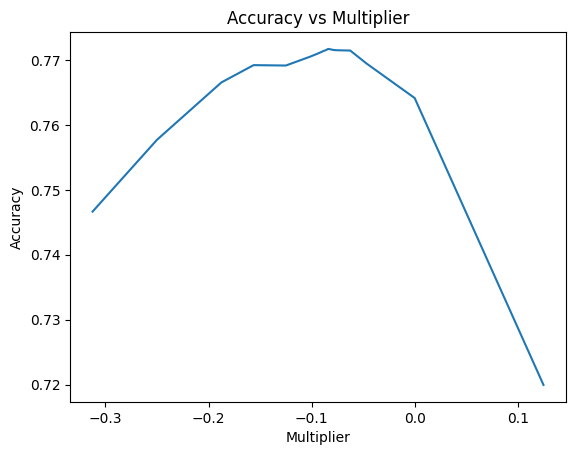

In [162]:
# Plot the accuracies:
import matplotlib.pyplot as plt


# sort the multipliers and accuracies
sorted_multipliers = sorted(accuracies.keys())
sorted_accuracies = [accuracies[multiplier] for multiplier in sorted_multipliers]



plt.plot(sorted_multipliers, sorted_accuracies)
plt.xlabel('Multiplier')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Multiplier')
plt.show()



In [11]:
# Highest accuracy:
max_accuracy = max(accuracies.values())
print('Max accuracy:', max_accuracy)

NameError: name 'accuracies' is not defined

The highest accuracy we've been able to get with this naive model is 0.6256. This represents the best score we could achieve by looking only at individual words, outside of any context.

Any model with a better score has either: 1) Identified correlations between combinations of words more likely to appear in either real of fake news, or 2) Found a better way to transform the weight values for each word (perhaps by doing a non-linear summing or other transformation)

<h2> Extra data </h2>
We will now use the extra data from exercise 2 and compare model strengths.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


# get exercise2_extra_data.csv:
extra_data = pd.read_csv('exercise2_extra_data.csv')

# Pre-process the data! We start by removing all rows with NaN values:

extra_data = extra_data.dropna()
from cleantext import clean

# Clean the text:

def clean_text(text):
    return clean(text, no_line_breaks=True, no_urls=True, no_emails=True, no_numbers=True, no_punct=True, replace_with_url="<URL>", replace_with_email="<EMAIL>", replace_with_number="<NUM>")

print("beginning cleaning")
extra_data['clean_text'] = extra_data['article_text'].apply(clean_text)
print("finished cleaning. size:", extra_data.shape)

stop_words = set(stopwords.words('english'))


pattern = r'<num>|<date>|<email>|<url>|\w+|[^\w\s]'
tokenizer = RegexpTokenizer(pattern)
stemmer = PorterStemmer()

def preprocess(text):
    tokens = tokenizer.tokenize(text)
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

    return ' '.join(tokens)

print("beginning preprocessing")
extra_data['tokens'] = extra_data['clean_text'].apply(preprocess)
# set all 'type' to real:
extra_data['type'] = 'real'

print(extra_data['tokens'])


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


beginning cleaning
finished cleaning. size: (4964, 5)
beginning preprocessing
0       jerusalem child doesnt name yet war she four d...
1       uk act selfdef attack houthi site yemen rishi ...
2       irishman face drug charg australia allegedli c...
3       jeremi bowen intern editor southern israel one...
4       gaza report remov protect vest learn colleagu ...
                              ...                        
4959    us militari aircraft eight peopl aboard crash ...
4960    crimin peru appear wrongfoot robberi shoe stor...
4961    kano dozen displac peopl fear abduct boko hara...
4962    brutal murder young kenyan woman shortterm ren...
4963    taiwan island practic purpos independ sinc <nu...
Name: tokens, Length: 4964, dtype: object


In [5]:
from collections import Counter

def vocabulary(rich_tokens):
    vocab = Counter()
    for sequence in rich_tokens:
        tokens = sequence.split()
        vocab.update(tokens)
    return vocab

# Find most common tokens in the extra data:
extra_vocab = vocabulary(extra_data['tokens'])
print('Number of tokens in the extra vocabulary:', len(extra_vocab))
print('Most common tokens in the extra data:', extra_vocab.most_common(10))


Number of tokens in the extra vocabulary: 43144
Most common tokens in the extra data: [('<num>', 56847), ('said', 19358), ('publish', 10896), ('say', 10104), ('mr', 9493), ('peopl', 8676), ('us', 7709), ('year', 7525), ('also', 6880), ('israel', 6271)]


In [165]:
# For fun, let's run our classification model on the extra data:
def classify(sequence, token_importance):
    tokens = sequence.split()
    score = 0
    for token in tokens:
        if token in token_importance:
            score += (token_importance[token])
    
    return score

def bin_classify(sequence, token_importance):
    score = classify(sequence, token_importance)
    return score > 0

Y_extra = extra_data['type']
Y_pred_extra = extra_data['tokens'].apply(lambda x: bin_classify(x, train_token_importance))

Y_bin_extra = Y_extra.isin(['reliable', 'political', 'real'])
Y_pred_bin_extra = Y_pred_extra

mask = Y_bin_extra.isin([True, False])
Y_bin_extra = Y_bin_extra[mask]
Y_pred_bin_extra = Y_pred_bin_extra[mask]

accuracy_extra = accuracy_score(Y_bin_extra, Y_pred_bin_extra)
print('Extra data accuracy:', accuracy_extra)

# real guess rate:
print('Percentage of real news in the extra data:', 100 * sum(Y_pred_bin_extra) / len(Y_pred_bin_extra))

Extra data accuracy: 0.31486704270749394
Percentage of real news in the extra data: 31.486704270749396


In [186]:
first_pred_tokens = extra_data['tokens'][500].split()
first_pred_importance = [((train_token_importance[token])) for token in first_pred_tokens if token in train_token_importance]
print('First prediction tokens:', first_pred_tokens)
print('First prediction importances:', first_pred_importance)
#sum:
print('Sum of importances:', sum(first_pred_importance))

# Figure out which tokens had the highest importance on the first prediction:
sorted_first_pred_importance = sorted(first_pred_importance)
# ^ thats the score. we need the token. so we need the index of the score in the original list:
sorted_first_pred_tokens = [token for token in first_pred_tokens if token in train_token_importance]
# ^ we need to sort the tokens based on the index of the score in the original list:
sorted_first_pred_tokens = [token for _, token in sorted(zip(first_pred_importance, first_pred_tokens))]
print('Sorted first prediction tokens:', sorted_first_pred_tokens)
print('Sorted first prediction importances:', sorted_first_pred_importance)


First prediction tokens: ['argentina', 'saw', 'price', 'almost', 'doubl', 'last', 'year', 'countri', 'annual', 'inflat', 'rate', 'hit', 'highest', 'level', '<num>', 'year', 'offici', 'figur', 'show', 'consum', 'price', 'jump', '<num>', '<num>', 'month', 'end', 'decemb', 'mark', 'south', 'american', 'countri', 'fastest', 'pace', 'inflat', 'sinc', '<num>', 'last', 'year', 'argentina', 'central', 'bank', 'rais', 'main', 'rate', 'interest', '<num>', 'tri', 'rein', 'soar', 'cost', 'live', 'monthli', 'basi', 'argentina', 'monthli', 'inflat', 'rate', 'stood', '<num>', 'decemb', 'monthli', 'figur', 'mark', 'small', 'victori', 'govern', 'presid', 'alberto', 'fernandez', 'countri', 'offici', 'inflat', 'rate', 'remain', 'peak', '<num>', 'juli', 'us', 'inflat', 'fall', 'lowest', 'year', 'price', 'rise', 'much', 'argentina', 'interest', 'rate', 'hit', '<num>', 'price', 'soar', 'polici', 'maker', 'politician', 'may', 'also', 'take', 'comfort', 'annual', 'rate', 'hit', 'three', 'figur', '<num>', 'pri

In [191]:
# Re-"train" with extra_data:

extra_vocab = vocabulary(extra_data['tokens'])
#combined_complete_vocab = complete_vocab.union(extra_vocab)
# its a counter ^ so:
combined_complete_vocab = complete_vocab + extra_vocab
combined_train_complete_vocab = train_complete_vocab.union(extra_vocab)


combined_frequent_words = {word: count for word, count in combined_complete_vocab.items() if count > 1000}

combined_fake_occurances = {word: count for word, count in train_fake_vocab.items() if word in combined_frequent_words}
combined_real_occurances = {word: count for word, count in train_real_vocab.items() if word in combined_frequent_words}

print('Top 10 fake tokens:')
print(sorted(combined_fake_occurances.items(), key=lambda x: x[1], reverse=True)[:10])
print('Top 10 real tokens:')
print(sorted(combined_real_occurances.items(), key=lambda x: x[1], reverse=True)[:10])

# we have train_fake_data['rich_tokens']
combined_fake_tokens = train_fake_data['rich_tokens']
# and train_real_data['rich_tokens'] + extra_data['tokens'] (all extra data is real)
combined_real_tokens = pd.concat([train_real_data['rich_tokens'], (extra_data['tokens'])])

from collections import Counter

def size_of_token_sequence_list_v2(sequence_list):
    count = Counter()
    for sequence in sequence_list:
        tokens = sequence.split()
        count.update([word for word in tokens if word in combined_frequent_words])
    
    return sum(count.values())

combined_fake_token_count = size_of_token_sequence_list_v2(combined_fake_tokens)
combined_real_token_count = size_of_token_sequence_list_v2(combined_real_tokens)

combined_fake_token_rates = {word: combined_fake_occurances[word] / combined_fake_token_count for word in train_fake_vocab if word in combined_frequent_words}
combined_real_token_rates = {word: combined_real_occurances[word] / combined_real_token_count for word in train_real_vocab if word in combined_frequent_words}

combined_token_importance = {}
for token in combined_frequent_words:
    if token in combined_fake_token_rates and token in combined_real_token_rates:
        if combined_real_token_rates[token] > combined_fake_token_rates[token]:
            combined_token_importance[token] = (combined_real_token_rates[token] / combined_fake_token_rates[token] -1)
        else:
            combined_token_importance[token] = -((combined_fake_token_rates[token] / combined_real_token_rates[token]) - 1)
    elif token in combined_fake_token_rates:
        combined_token_importance[token] = 0
    else:
        combined_token_importance[token] = 0

combined_sorted_tokens = sorted(combined_token_importance.items(), key=lambda x: x[1], reverse=True)

print('The 50 most positive tokens:')
print(combined_sorted_tokens[:50])
print('The 50 most negative tokens:')
print(combined_sorted_tokens[-50:])

print('The 50 most neutral tokens:')
print(sorted([x for x in combined_token_importance.items() if x[1] != 0], key=lambda x: abs(x[1]))[:50])

Top 10 fake tokens:
[(',', 5809153), ('.', 5806742), ('<num>', 1955302), ('"', 1932354), ("'", 1746881), ('-', 1278484), (':', 653730), (')', 592399), ('(', 580634), ('?', 308690)]
Top 10 real tokens:
[('.', 10202872), (',', 9307228), ("'", 4078123), ('<num>', 3251668), ('"', 3062065), ('-', 2484373), (':', 886558), (')', 691604), ('(', 685507), ('said', 674782)]
The 50 most positive tokens:
[('yazd', 3924.0924545113267), ('davar', 3923.933266757159), ('alfoneh', 3142.5124190990823), ('aftab', 3140.7295162524047), ('safavi', 1568.7822813978626), ('nowruz', 1308.3723406135039), ('gholam', 1206.9166786239991), ('kayhan', 1046.497872490803), ('rec', 916.8140038921811), ('shorefront', 646.8941594622663), ('kossack', 615.3749841370749), ('pooti', 603.2767148203349), ('bulgi', 530.6870989198942), ('fullscreen', 509.0375643530961), ('trumprussia', 308.67324444076877), ('telecharg', 306.23236554353167), ('magnifico', 303.15473562962416), ('sayyari', 300.86896274926835), ('dko', 260.97756114444

In [194]:
# how large is extra-data:
print('Size of extra data:', extra_data.shape)
# and train data:
print('Size of train data:', train_data.shape)

Size of extra data: (4964, 7)
Size of train data: (765743, 20)


In [196]:
def classify(sequence, token_importance):
    tokens = sequence.split()
    score = 0
    for token in tokens:
        if token in token_importance:
            score += token_importance[token]
    return score

def bin_classify(sequence, token_importance):
    score = classify(sequence, token_importance)
    return score > 0

# Test the classification model on the training data:
Y = train_data['type']
Y_pred = train_data['rich_tokens'].apply(lambda x: bin_classify(x, combined_token_importance))

#Y_pred = Y_pred.replace({False: 'fake', True: 'real'})

print('y_pred:', Y_pred)
# print first 10 of both y and y_pred

# Synonyms for fake and real:
#Y = Y.replace({'fake': False, 'conspiracy': False, 'bias': False, 'hate': False, 'reliable': True, 'political': True})
# TypeError: Cannot set non-string value 'False' into a StringArray.^
#Y_bin = Y.isin(['fake', 'conspiracy', 'bias', 'hate'])
Y_bin = Y.isin(['reliable', 'political'])
Y_pred_bin = Y_pred

# Remove all rows with NaN values or values that aren't in the set {True, False} from BOTH Y and Y_pred:
# I.e. if Y has a NaN value at index i, remove index i from Y and Y_pred.
mask = Y_bin.isin([True, False])
Y_bin = Y_bin[mask]
Y_pred_bin = Y_pred_bin[mask]




from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_bin, Y_pred_bin)
print('Training accuracy:', accuracy)


y_pred: __null_dask_index__
16389    False
16971    False
26070    False
22583     True
9579      True
         ...  
11178     True
24838     True
7932     False
20155    False
28958    False
Name: rich_tokens, Length: 765743, dtype: bool
Training accuracy: 0.7638946748452157


In [197]:
# how much of the data is real vs fake:
print('Percentage of real news in the training data:', 100 * sum(Y_bin) / len(Y_bin))
print('Percentage of real news in the prediction:', 100 * sum(Y_pred_bin) / len(Y_pred_bin))

Percentage of real news in the training data: 41.559766135635584
Percentage of real news in the prediction: 44.383690089233596


In [195]:
accuracies = {}

def classify(sequence, token_importance, multiplier):
    tokens = sequence.split()
    score = 0
    for token in tokens:
        if token in token_importance:
            score += (token_importance[token]) + multiplier
    return score 

def evaluate_model(test_data, token_importance, multiplier):
    Y = test_data['type']
    #Y_pred = test_data['rich_tokens'].apply(lambda x: bin_classify(x, token_importance, multiplier))
    # we use classify and check if its > 0
    Y_pred = test_data['rich_tokens'].apply(lambda x: classify(x, token_importance, multiplier) > 0)
    Y_bin = Y.isin(['reliable', 'political'])
    Y_pred_bin = Y_pred
    mask = Y_bin.isin([True, False])
    Y_bin = Y_bin[mask]
    Y_pred_bin = Y_pred_bin[mask]
    accuracy = accuracy_score(Y_bin, Y_pred_bin)
    #print how many, in % have been marked as real:
    print('Percentage of real news:', 100 * sum(Y_pred_bin) / len(Y_pred_bin))
    return accuracy

def optimize_multiplier(test_data, token_importance, low, high, max_iterations=20):
    for _ in range(max_iterations):
        print('low:', low, 'high:', high)
        mid = (low + high) / 2
        left_mid = mid - (mid - low) / 4
        right_mid = mid + (high - mid) / 4

        mid_accuracy = evaluate_model(test_data, token_importance, mid)
        left_accuracy = evaluate_model(test_data, token_importance, left_mid)
        right_accuracy = evaluate_model(test_data, token_importance, right_mid)

        accuracies.update({mid: mid_accuracy, left_mid: left_accuracy, right_mid: right_accuracy})

        print('mid:', mid, 'mid_accuracy:', mid_accuracy)
        print('left_mid:', left_mid, 'left_accuracy:', left_accuracy)
        print('right_mid:', right_mid, 'right_accuracy:', right_accuracy)

        # Choose the direction with the highest accuracy
        if left_accuracy >= mid_accuracy and left_accuracy >= right_accuracy:
            high = mid
        elif right_accuracy >= mid_accuracy and right_accuracy >= left_accuracy:
            low = mid
        else:
            low = left_mid
            high = right_mid

        if high - low < 0.01:
            break

    return (low + high) / 2


# Test the classification model on the test data:
multiplier = optimize_multiplier(test_data, combined_token_importance, -0.5, 0.5)
print('Multiplier:', multiplier)
accuracy = evaluate_model(test_data, combined_token_importance, multiplier)
print('Testing accuracy:', accuracy)

low: -0.5 high: 0.5
Percentage of real news: 44.45140934829395
Percentage of real news: 29.922271673039553
Percentage of real news: 60.80778954846528
mid: 0.0 mid_accuracy: 0.7663135460414969
left_mid: -0.125 left_accuracy: 0.7682463068597338
right_mid: 0.125 right_accuracy: 0.7315865354478781
low: -0.5 high: 0.0
Percentage of real news: 21.673039553688962
Percentage of real news: 19.160450489980985
Percentage of real news: 24.986940805282185
mid: -0.25 mid_accuracy: 0.7544975866608161
left_mid: -0.3125 left_accuracy: 0.743078626799557
right_mid: -0.1875 right_accuracy: 0.7642763116655175
low: -0.25 high: 0.0
Percentage of real news: 29.922271673039553
Percentage of real news: 27.061785662048937
Percentage of real news: 33.02827054472513
mid: -0.125 mid_accuracy: 0.7682463068597338
left_mid: -0.15625 left_accuracy: 0.7679955703211517
right_mid: -0.09375 right_accuracy: 0.7701790676779707
low: -0.125 high: 0.0
Percentage of real news: 36.294113959756785
Percentage of real news: 34.63402